In [71]:
import numpy as np
import arepo
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.constants import c

In [2]:
basepath = '/Users/abeane/Projects/GSEgas'

In [3]:
sn = arepo.Snapshot(basepath + '/runs/MW3iso_fg0.5/lvl3/output/', 50, combineFiles=True)

In [8]:
rhocrit = 0.301302

In [9]:
E = 1E50 * u.erg

(array([ 27.,  81., 133., 137., 135.,  88.,  78.,  34.,   9.,   1.]),
 array([1.0117722e-06, 1.5136333e-06, 2.0154944e-06, 2.5173554e-06,
        3.0192164e-06, 3.5210774e-06, 4.0229384e-06, 4.5247998e-06,
        5.0266608e-06, 5.5285218e-06, 6.0303828e-06], dtype=float32),
 <BarContainer object of 10 artists>)

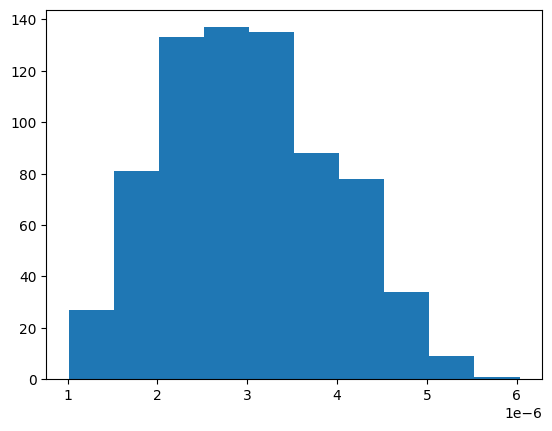

In [15]:
Vcell = sn.part0.mass.value / sn.part0.rho.value
key = np.logical_and(sn.part0.rho.value > rhocrit*0.99, sn.part0.rho.value < rhocrit * 1.01)
plt.hist(Vcell[key])

In [18]:
V = 3E-6 * u.kpc**3

(array([  7.,  34.,  48., 110., 124., 123., 139.,  95.,  39.,   4.]),
 array([0.01335871, 0.0144449 , 0.01553109, 0.01661729, 0.01770348,
        0.01878967, 0.01987586, 0.02096205, 0.02204824, 0.02313443,
        0.02422062], dtype=float32),
 <BarContainer object of 10 artists>)

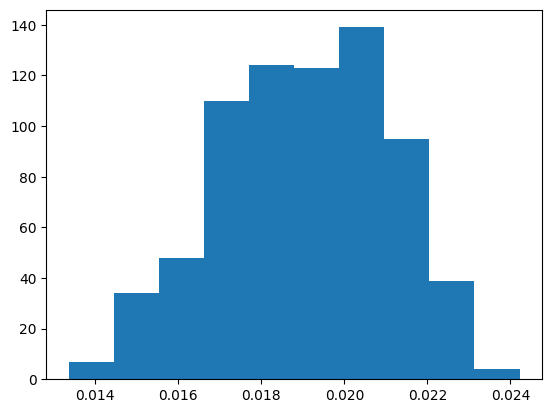

In [24]:
Vcell = sn.part0.mass.value / sn.part0.rho.value
rcell = ((3*np.pi/4.) * Vcell)**(1/3.)
key = np.logical_and(sn.part0.rho.value > rhocrit*0.99, sn.part0.rho.value < rhocrit * 1.01)
plt.hist(rcell[key])

In [27]:
E = 1E50 * u.erg
E = E.to(1E10*u.Msun * (u.km/u.s)**2).value

In [29]:
V = 3E-6
r = 0.02

P = E/V
rho = rhocrit

GAMMA = 5./3.
G = 43018.7

h = np.sqrt(GAMMA * P/G) * 1 / (10*rho)
print(h)

0.02674731157384392


In [32]:
tau = 10
L1 = 10.**(36.2) * u.erg/u.s/u.Msun
L = 7.5E3 * u.Msun * L1
pdot = tau * L / c

In [44]:
pdot
pdot = pdot.to_value(1E10*u.Msun*(u.km/u.s)**2/u.kpc)

In [45]:
A = 4*np.pi*r**2

Press = pdot/A
print(Press)

12.240956087495464


In [46]:
h = np.sqrt(GAMMA * Press/G) * 1 / (10*rho)
print(h)

0.00722772115675774


In [54]:
rho = rhocrit * 1
Vcell = sn.part0.mass.value / sn.part0.rho.value
rcell = ((3*np.pi/4.) * Vcell)**(1/3.)
rhocell = sn.part0.rho.value
key = np.logical_and(sn.part0.rho.value > rho*0.99, sn.part0.rho.value < rho * 1.01)

V = np.median(Vcell[key])
r = np.median(rcell[key])

tau = 10
L1 = 10.**(36.2) * u.erg/u.s/u.Msun
L = 7.5E3 * u.Msun * L1
pdot = tau * L / c
pdot = pdot.to_value(1E10*u.Msun*(u.km/u.s)**2/u.kpc)
A = 4*np.pi*r**2
Press = pdot/A
h = np.sqrt(GAMMA * Press/G) * 1 / (10*rho)

print(r)
print(h)

0.0190929
0.007571108527150973


In [69]:
rho = rhocrit * 0.25
Vcell = sn.part0.mass.value / sn.part0.rho.value
rcell = ((3*np.pi/4.) * Vcell)**(1/3.)
rhocell = sn.part0.rho.value
key = np.logical_and(sn.part0.rho.value > rho*0.99, sn.part0.rho.value < rho * 1.01)

V = np.median(Vcell[key])
r = np.median(rcell[key])

tau = 10

# L1 = 10.**(36.2) * u.erg/u.s/u.Msun
# L = 7.5E3 * u.Msun * L1

L = 1E3 * 7.5E3 * u.Lsun

pdot = tau * L / c
pdot = pdot.to_value(1E10*u.Msun*(u.km/u.s)**2/u.kpc)
A = 4*np.pi*r**2
Press = pdot/A
h = np.sqrt(GAMMA * Press/G) * 1 / (10*rho)

print(r)
print(h)

0.030160494
0.029794691161756693


In [135]:
rho = rhocrit*10
Vcell = sn.part0.mass.value / sn.part0.rho.value
rcell = ((3*np.pi/4.) * Vcell)**(1/3.)
ucell = sn.part0.u.value
rhocell = sn.part0.rho.value
key = np.logical_and(sn.part0.rho.value > rho*0.99, sn.part0.rho.value < rho * 1.01)

V = np.median(Vcell[key])
r = np.median(rcell[key])
u_ = np.median(ucell[key])

P = (GAMMA-1) * rho * u_

kappaIR = 10 * u.cm**2/u.g
rhodust = rho * 0.0127
rhodust *= 1E10 * u.Msun / u.kpc**3

tau = kappaIR * rhodust * r * u.kpc
print(tau.to(u.dimensionless_unscaled))

# L1 = 10.**(36.2) * u.erg/u.s/u.Msun
# L = 7.5E3 * u.Msun * L1

L = 1E3 * 1E5 * u.Lsun
# L = 7E7 * u.Lsun

pdot = tau * L / c
pdot = pdot.to_value(1E10*u.Msun*(u.km/u.s)**2/u.kpc)
A = 4*np.pi*r**2
Press = pdot/A
# h = np.sqrt(GAMMA * Press/G) * 1 / (10*rho)
print(P, Press)
print(Press/P)
# print(r)
# print(h)




0.006989457602273129
9.35009740556717 1.4406670814932794
0.1540804356364766


In [103]:
7E7 / 1E3

70000.0

In [131]:
key = np.argmin(np.abs(sn.part0.rho.value - rhocrit*1000))
pos = sn.part0.pos.value[key]
print(pos)

rdiff = np.linalg.norm(sn.part4.pos.value - pos, axis=1)
in_sc = rdiff < 0.01
print(len(np.where(in_sc)[0]))

[49.25920095 47.32916416 49.94177092]
1


In [133]:
20 * 7.5E3/1E6

0.15

In [136]:
(1E3 * u.Lsun / (17 * u.eV)).to(1/u.s)

<Quantity 1.40544098e+47 1 / s>

In [140]:
np.max(sn.part4.RadFeedTau[sn.part4.RadFeedTau > -999])

0.0

### notes

check IR optical depths

compute surface densities by hand, compute optical depth by hand

Arp 220 - 

check turbulent velocities, if higher than sound speed photoionization will not work



In [1]:
2**8

256

In [2]:
(129.891-126.109)/129.891

0.029116720942944443

In [4]:
2**33

8589934592